In [1]:
# Import dependencies.
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# SQLAlchemy Create Engine
Another really great feature of SQLAlchemy is the create engine function. This function's primary purpose is to set up the ability to query a SQLite database. After all, data just sitting in a database that we can't access does us no good.

In order to connect to our SQLite database, we need to use the create_engine() function. This function doesn't actually connect to our database; it just prepares the database file to be connected to later on.

This function will typically have one parameter, which is the location of the SQLite database file. Try this function by adding the following line to your code:

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

We've got our engine created—good work! Next we're going to reflect our existing database into a new model with the automap_base() function. Reflecting a database into a new model essentially means to transfer the contents of the database into a different structure of data.

# SQLAlchemy Automap Base
Automap Base creates a base class for an automap schema in SQLAlchemy. Basically, it sets up a foundation for us to build on in SQLAlchemy, and by adding it to our code, it will help the rest of our code to function properly.

In order for your code to function properly, you will need to add this line to your code:

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# SQLAlchemy Reflect Tables
Now that we've gotten our environment set up for SQLAlchemy, we can reflect our tables with the prepare() function. By adding this code, we'll reflect the schema of our SQLite tables into our code and create mappings.

IMPORTANT
Remember when we talked about keeping our code decoupled? When we **reflect** tables, we create classes that help keep our code separate. This ensures that our code is separated such that if other classes or systems want to interact with it, they can interact with only specific subsets of data instead of the whole dataset.

Add the following code to reflect the schema from the tables to our code:

In [7]:
# reflect the tables
Base.prepare(engine, reflect=True)

Now that we've reflected our database tables, we can check out the classes we'll be creating with Automap.

# View Classes Found by Automap
Once we have added the base.prepare() function, we should confirm that the Automap was able to find all of the data in the SQLite database. We will double-check this by using Base.classes.keys(). This code references the classes that were mapped in each table.

+ Base.classes gives us access to all the classes.
+ keys() references all the names of the classes.

IMPORTANT
Previously, we talked about decoupled systems in the SQLAlchemy ORM. This directly relates to the classes we have created here. These classes help keep our data separate, or decoupled. Keep in mind that our data is no longer stored in tables, but rather in classes. The code we will run below enables us to essentially copy, or reflect, our data into different classes instead of database tables.

Run the following code:

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

Now that we've viewed all of our classes, we can create references to each table.

# Save References to Each Table
In order to reference a specific class, we use Base.classes.<class name>. For example, if we wanted to reference the station class, we would use Base.classes.station.

Since it can be rather cumbersome to type Base.classes every time we want to reference the measurement or station classes, we can give the classes new variable names. In this case, we will create new references for our Measurement class and Station class. Add these new variables to your code:

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

Now that we have our references saved to some new variables, let's work on creating a session link to our database.

# Create Session Link to the Database
Let's create a session link to our database with our code. First, we'll use an SQLAlchemy Session to query our database. Our session essentially allows us to query for data.

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In the weather database, let's calculate the date one year from August 23, 2017. We'll be creating a variable called prev_year and using the datetime dependency that we imported previously.

The datetime dependency has a function called dt.date(), which specifies the date in the following format: year, month, day.

## Find the Date One Year Ago
Add the most recent date, August 23, 2017, with the following code:

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)

This code specifies the most recent date, but we want to calculate the date one year back. To do this, add the dt.timedelta() function to the previous line of code. This function allows us to trace back a certain number of days. In this case, we want to go back 365 days. Go ahead and add the dt.timedelta() function to your code.

In [12]:
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

Now that we've got our date from the previous year (August 23, 2016), let's retrieve the amount of precipitation that was recorded, or the precipitation score.

## Retrieve the Precipitation Scores
We'll begin by creating a variable to store the results of the query we'll write. This variable will be called results:

In [13]:
# Perform a query to retrieve the data and precipitation scores
results = []

This code defines our new variable. Next, let's add our session that we created earlier so that we can query our database. For this we'll use the session.query() function, which is how we'll begin all of our queries in SQLAlchemy. From a bird's-eye view, this is how we query a SQLite database using Python.

The session.query() function for this query will take two parameters. We will reference the Measurement table using Measurement.date and Measurement.prcp. Add the following to your code:

In [14]:
results = session.query(Measurement.date, Measurement.prcp)
print(results.all())

[('2010-01-01', 0.08), ('2010-01-02', 0.0), ('2010-01-03', 0.0), ('2010-01-04', 0.0), ('2010-01-06', None), ('2010-01-07', 0.06), ('2010-01-08', 0.0), ('2010-01-09', 0.0), ('2010-01-10', 0.0), ('2010-01-11', 0.01), ('2010-01-12', 0.0), ('2010-01-14', 0.0), ('2010-01-15', 0.0), ('2010-01-16', 0.0), ('2010-01-17', 0.0), ('2010-01-18', 0.0), ('2010-01-19', 0.0), ('2010-01-20', 0.0), ('2010-01-21', 0.0), ('2010-01-22', 0.0), ('2010-01-23', 0.0), ('2010-01-24', 0.01), ('2010-01-25', 0.0), ('2010-01-26', 0.04), ('2010-01-27', 0.12), ('2010-01-28', 0.0), ('2010-01-30', None), ('2010-01-31', 0.03), ('2010-02-01', 0.01), ('2010-02-03', None), ('2010-02-04', 0.01), ('2010-02-05', 0.0), ('2010-02-06', 0.0), ('2010-02-07', 0.0), ('2010-02-08', 0.0), ('2010-02-09', 0.0), ('2010-02-11', 0.0), ('2010-02-12', 0.02), ('2010-02-13', 0.01), ('2010-02-14', 0.0), ('2010-02-15', 0.0), ('2010-02-16', 0.0), ('2010-02-17', 0.0), ('2010-02-19', None), ('2010-02-20', 0.03), ('2010-02-21', 0.0), ('2010-02-22', 0.

We still have a few aspects to add to our query, but we'll get to that shortly.

Since we only want to see the most recent data, we need to filter out all of the data that is older than a year from the last record date. We'll use the filter() function to filter out the data we don't need. Add the filter() function to the existing query.

In [15]:
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)

One last thing: we'll add a function that extracts all of the results from our query and put them in a list. To do this, add .all() to the end of our existing query. All said and done, your query should look something like this:

In [16]:
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
print(results)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

IMPORTANT
When you're handling a data analysis problem, printing your results is one of the most important tasks you can do. This can help you debug your code and ensure that you're getting all the data that you are expecting.

You should print your results frequently so that you can make sure you're getting the data that you expect. Otherwise, you might spend hours working on code only to discover you're way off track.

# Save Query Results
We have our weather results saved in a variable. In order to access it in the future, we'll save it to a Python Pandas DataFrame. We'll start by creating a DataFrame variable, df, which we can use to save our query results.

In order to save our results as a DataFrame, we need to provide our results variable as one parameter and specify the column names as our second parameter. To do this, we'll add the following line to our code:

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitaion'])

This saves our query results in two columns, date and precipitation. Now we can manipulate the results however we would like. There are many functions you can use to manipulate how DataFrames look, but we'll start with using the set_index() function.

## Use the set_index() Function
The set_index() function can be a little tricky, but let's jump in. For example, let's say our DataFrame looks something like below. Note that our data will not look like this exactly—this is just an example.

 date        precipitation
0   08/23/2017  1
1   08/22/2017  2
2   08/21/2017  1
3   08/20/2017  1

The first column is auto-generated and contains the row number. However, we want the index column to be the date column, so we'll need to get rid of those row numbers.

To do this, set the index to the date column. This will make the date column the first column.

For this project, we're going to experiment and write over our original DataFrame. By doing this, we can reduce the complexity of our code and use fewer variables.

REWIND
We can use the variable inplace to specify whether or not we want to create a new DataFrame.

Let's go ahead and use the same DataFrame. By setting inplace=True, we're saying that we do not want to create a new DataFrame with the modified specifications. If we set it to "False," then we would create a new DataFrame. Add the following to your code:

In [18]:
# Sort the dataframe by date
df.set_index(df['date'], inplace=True)
print(df)

                  date  precipitaion
date                                
2016-08-23  2016-08-23          0.00
2016-08-24  2016-08-24          0.08
2016-08-25  2016-08-25          0.08
2016-08-26  2016-08-26          0.00
2016-08-27  2016-08-27          0.00
...                ...           ...
2017-08-19  2017-08-19          0.09
2017-08-20  2017-08-20           NaN
2017-08-21  2017-08-21          0.56
2017-08-22  2017-08-22          0.50
2017-08-23  2017-08-23          0.45

[2230 rows x 2 columns]


Great work! Our DataFrame looks good. However, because we are using the date as the index, the DataFrame has two date columns, which is confusing. So we'll print the DataFrame without the index so we can see just the date and precipitation.

For this task, we'll need to use a slightly different print statement. First we'll convert the DataFrame to strings, and then we'll set our index to "False." This will allow us to print the DataFrame without the index. Add the following to your code:

In [19]:
print(df.to_string(index=False))

      date  precipitaion
2016-08-23          0.00
2016-08-24          0.08
2016-08-25          0.08
2016-08-26          0.00
2016-08-27          0.00
2016-08-28          0.01
2016-08-29          0.00
2016-08-30          0.00
2016-08-31          0.13
2016-09-01          0.00
2016-09-02          0.00
2016-09-03          0.00
2016-09-04          0.03
2016-09-05           NaN
2016-09-06           NaN
2016-09-07          0.05
2016-09-08          0.00
2016-09-09          0.03
2016-09-10          0.00
2016-09-11          0.05
2016-09-12          0.00
2016-09-13          0.02
2016-09-14          1.32
2016-09-15          0.42
2016-09-16          0.06
2016-09-17          0.05
2016-09-18          0.00
2016-09-19          0.00
2016-09-20          0.00
2016-09-21          0.00
2016-09-22          0.02
2016-09-23          0.00
2016-09-24          0.00
2016-09-25          0.00
2016-09-26          0.06
2016-09-27          0.02
2016-09-28          0.00
2016-09-29          0.00
2016-09-30          0.00


In [20]:
# Sort values by date using sort_index() function.
df = df.sort_index()
print(df.to_string(index=False))

      date  precipitaion
2016-08-23          0.00
2016-08-23           NaN
2016-08-23          1.79
2016-08-23          0.05
2016-08-23          0.15
2016-08-23          0.70
2016-08-23          0.02
2016-08-24          0.08
2016-08-24          2.15
2016-08-24          2.28
2016-08-24           NaN
2016-08-24          1.45
2016-08-24          1.22
2016-08-24          2.15
2016-08-25          0.08
2016-08-25          0.00
2016-08-25          0.21
2016-08-25          0.06
2016-08-25          0.00
2016-08-25          0.11
2016-08-25          0.08
2016-08-26          0.03
2016-08-26          0.01
2016-08-26          0.00
2016-08-26          0.04
2016-08-26          0.02
2016-08-26          0.00
2016-08-27          0.18
2016-08-27          0.12
2016-08-27          0.00
2016-08-27          0.00
2016-08-27          0.02
2016-08-27           NaN
2016-08-28          0.60
2016-08-28          0.14
2016-08-28          0.01
2016-08-28          0.14
2016-08-28          0.14
2016-08-28          2.07


<AxesSubplot:xlabel='date'>

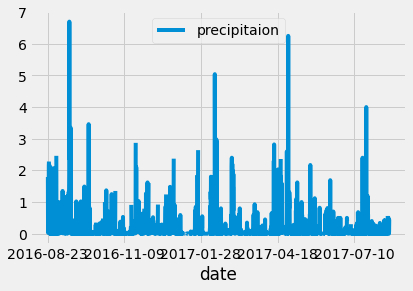

In [28]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [29]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitaion
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [23]:
# How many stations are available in this dataset?


In [24]:
# What are the most active stations?
# List the stations and the counts in descending order.


In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [26]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [27]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge